<a href="https://colab.research.google.com/github/brunnagual/arquivos/blob/main/miniprojetoRoofImoveis_brunna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Recebemos os dados dos preços das casas e características do condado de County, WA os dados são de maio de 2014 a 2015 sendo observado 21,613 registros contendo 21 variáveis.

Com esses dados foi passado que deveríamos apresentar os 5 imoveis que deverá investir, o porquê e quais 5 eu não recomendaria o investimento.


#A Questão de Negócio:
- Qual a minha meta?

Apresentar os 5 imoveis que deverá investir e os 5 que não deverá investir.
- Como posso chegar?

Através da analise de dados utilizando as bibliotecas do python.


# O Entendimento do Negócio:
- Quais dados eu tenho disponível?

Temos os dados do condado do ano de 2014 á 2015.
- Eles são relevantes para o problema?

Sim, pois contém informações como cep e valor de vende e local que é muito relevante para esse tipo de analise.
- Eles me trazem uma solução direta?

Não, eles trazem informações gerais que precisam ser trabalhadas para apresentar uma solução.
- Qual o meu setor ou range de negócio?

O setor é o imobiliario.

#A Coleta de Dados:
- Os dados que eu tenho fazem sentido?

Sim, mas não são diretos eles precisaram de uma limpeza.
- Estão no formato que eu gostaria?

Alguns atributos não, como atributo de data que precisou ser modificado para o formato padrão e alguns atributos estavam com o tipo da variavel incorreto.
- O que mais eu consigo obter de informação destes dados?

Sim, consiguiria por exemplo trazer uma base externa como de IDH ou variaveis socio economico daregião.

#A Limpeza de Dados:
- Remoção de dados outliers e valores ausentes.

Sim, foi necessário fazer a remoção de valores ausentes e remover dados repetidos

#A Exploração de Dados:
- Visualização dos dados.

Sim, foi necessário utilizar seaborn, boxplot.

- Quais as minhas métricas essenciais.

As metricas utilizadas para foi o preço e a quantidade quartos que utilizei para entender qual é o melhor custo beneficio que eu indicaria.

- Baseado nos dados, qual imóvel ou tipo de imóveis eu deveria comprar.

A partir dos dados analisados vi que as casas que possuiam mais quartos tinham tendencia a ser mais caro por conta do tamanho então em minha analise o que fez mais sentido no quesito custo beneficio utilizei a quartidade de quartos pelo preço para saber quais valiam mais a pena.

#Quais 5 imóveis que a empresa deveria investir e o porquê 
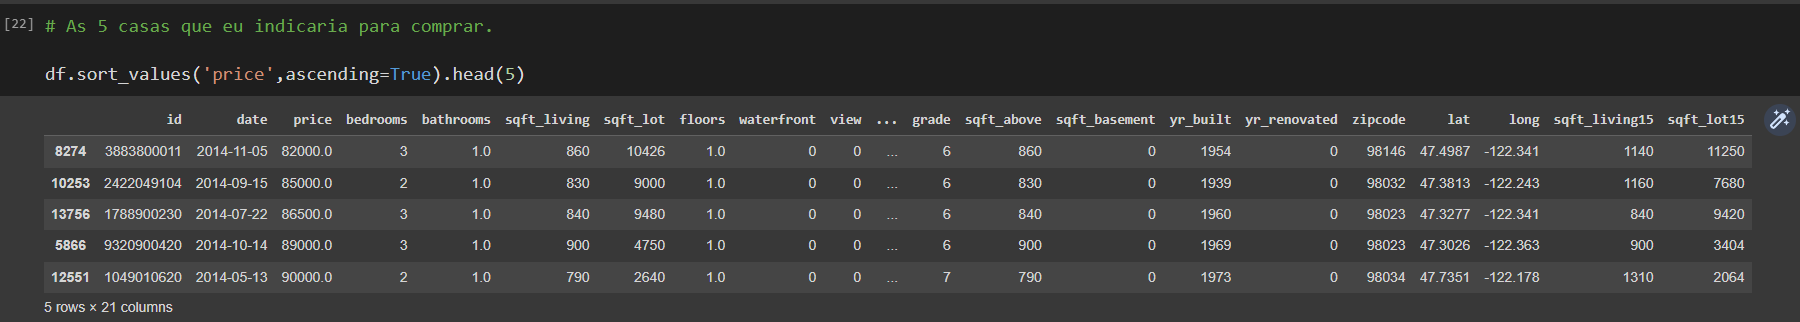
#E quais 5 você não recomendaria o investimento de jeito nenhum.

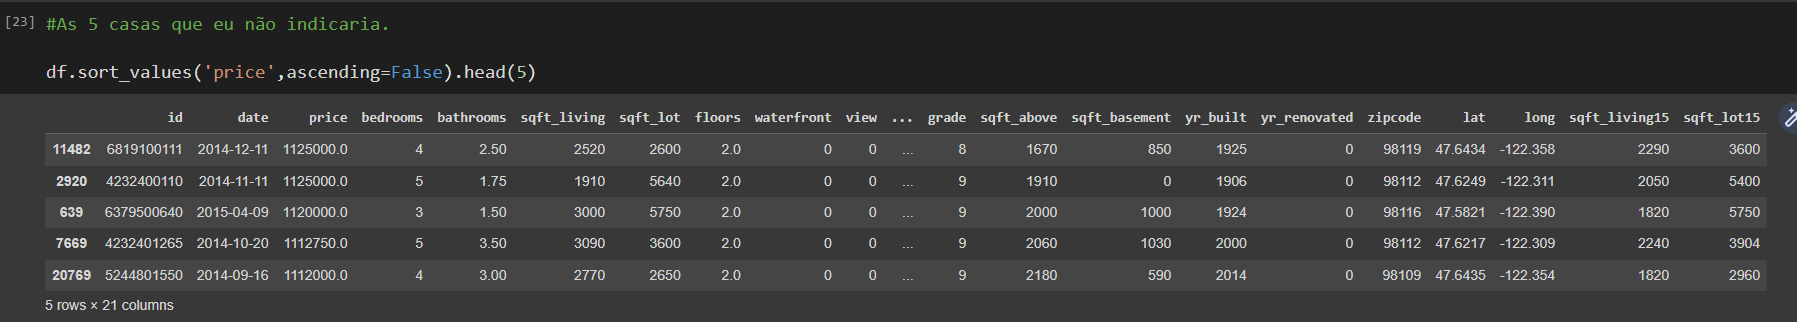

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


- Encontre a cidade de cada imóvel;
- Calcule o preço por área de imóvel; - Feito
- Calcule o lucro/ perda de investimento caso o imóvel
seja vendido mais de uma vez naquele período.

In [ ]:
df = pd.read_csv("/content/kc_house_data.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df["date"] = pd.to_datetime(df["date"]) # convertendo a coluna data para o formato correto.
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#Função para remover outliers
def remove_outliers_iqr(df,column):
    distance = 1.5
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    lower_threshold = df[column].quantile(0.25)-(iqr*distance)
    upper_threshold = df[column].quantile(0.75)+(iqr*distance)
    outliers = []
    for i in df[column]:
        if i>upper_threshold or i<lower_threshold:
            outliers.append(i)
        else:
            pass
    outliers = pd.Series(outliers)
    filtered_df = df[~df[column].isin(outliers)]
    return filtered_df

def create_boxplot(df, column):
    f, axe = plt.subplots(1, 1,figsize=(18,5))
    sns.despine(left=True, bottom=True)
    sns.boxplot(x=df[column],y=df['price'], ax=axe)
    axe.yaxis.tick_left()
    axe.set(xlabel=column, ylabel='Price')

In [ ]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


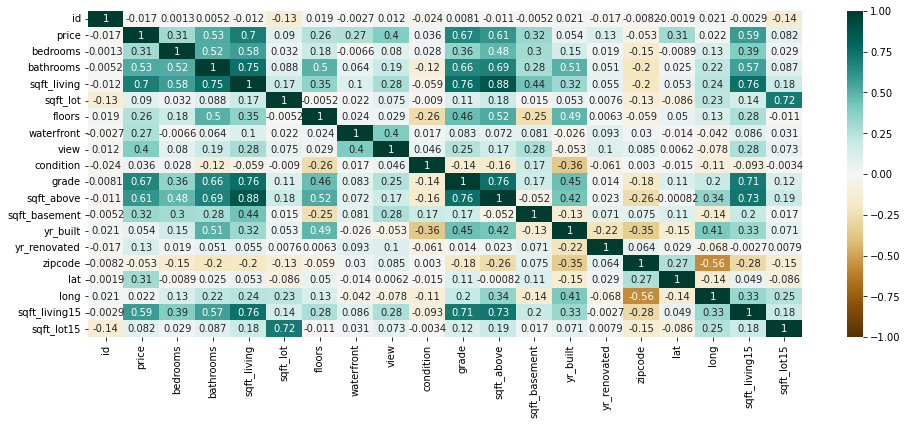

In [ ]:

plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG');

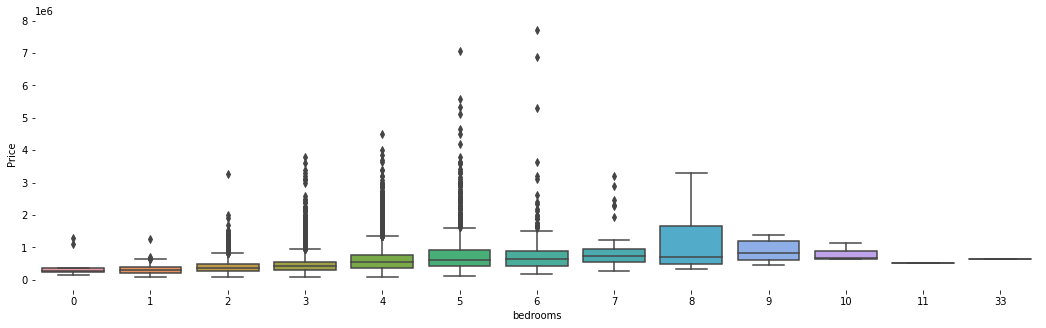

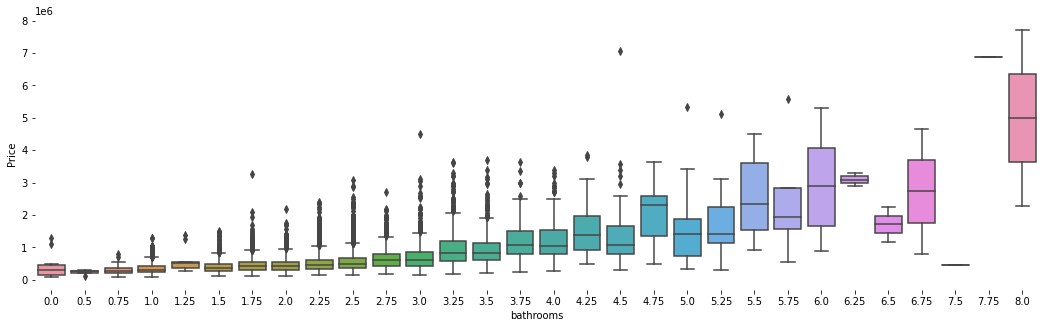

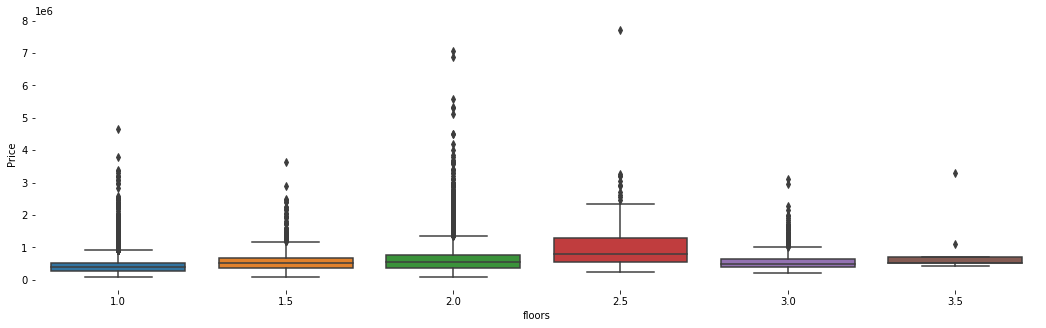

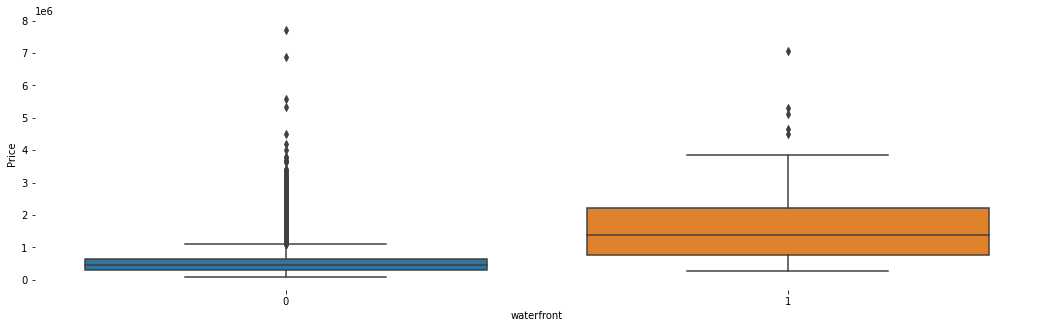

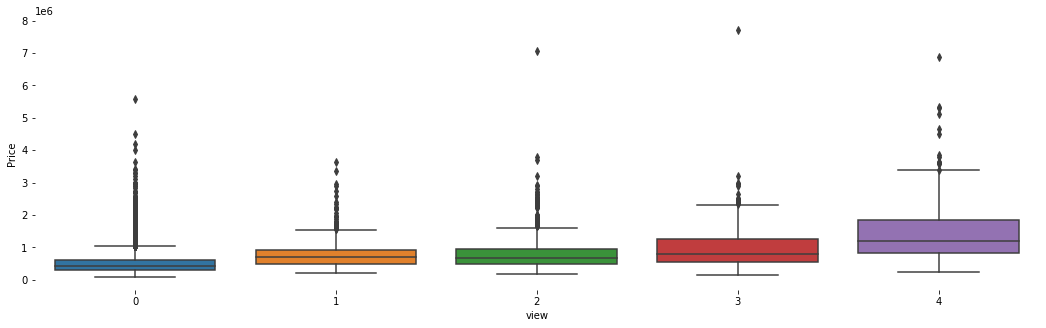

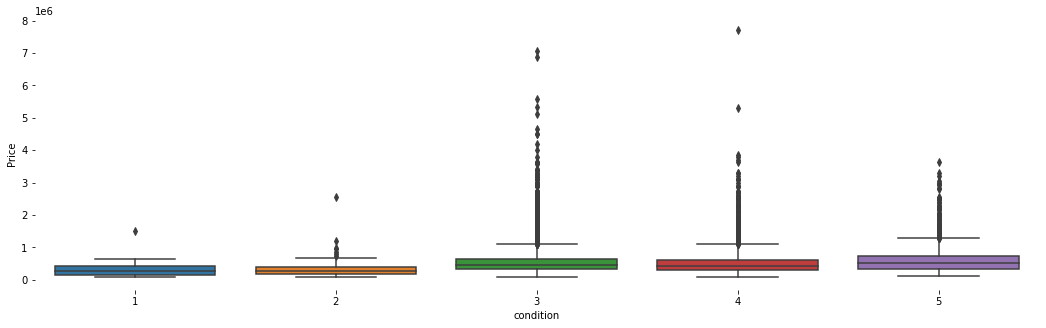

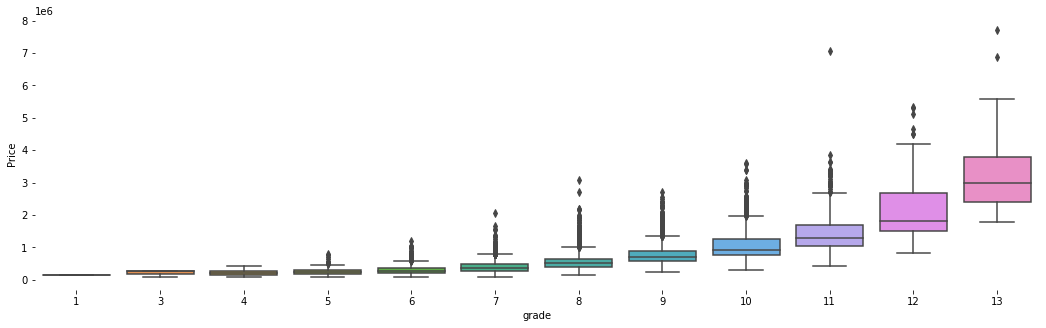

In [ ]:
columns = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade']
for c in columns:
    create_boxplot(df,c)

In [ ]:
for c in df.columns:
    df = remove_outliers_iqr(df,c)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  del sys.path[0]


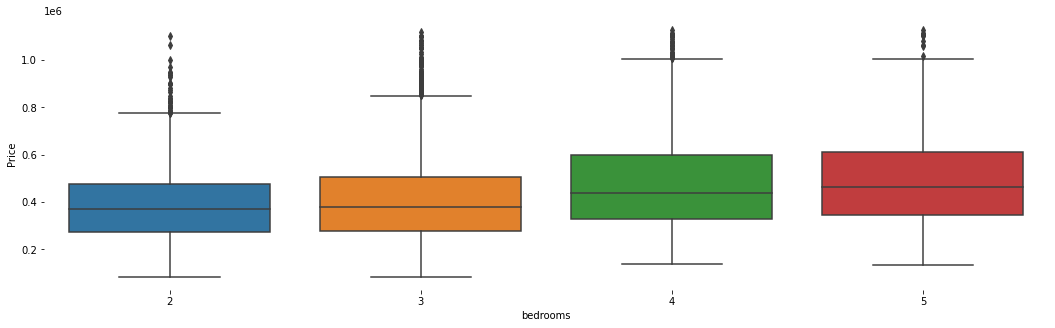

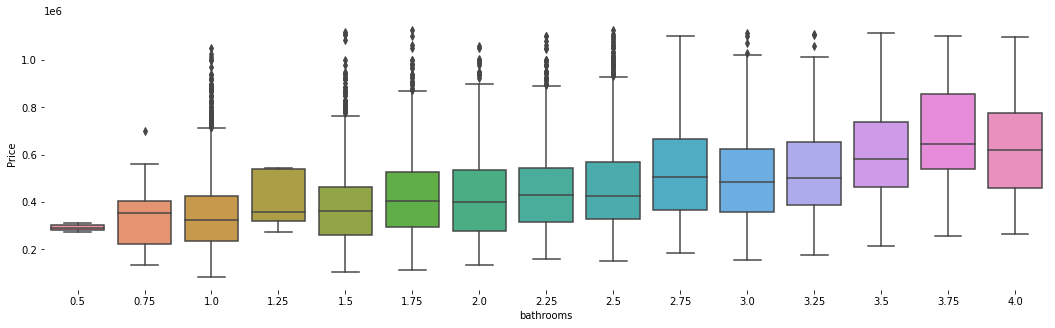

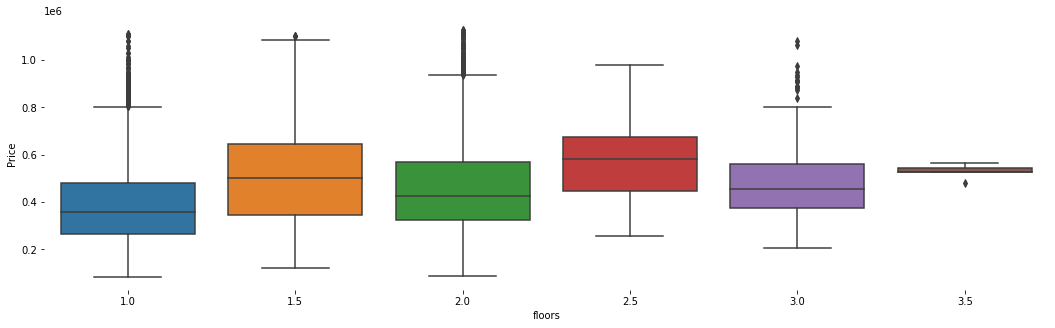

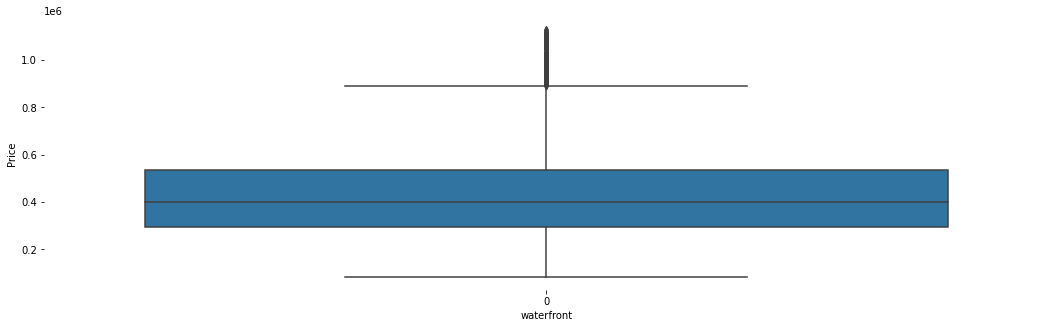

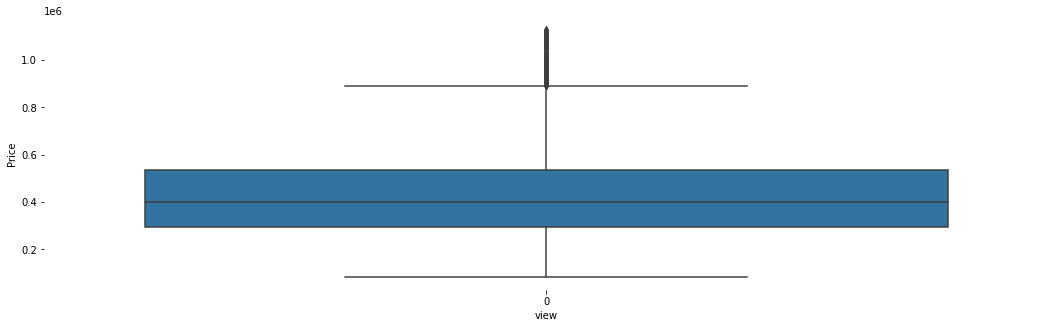

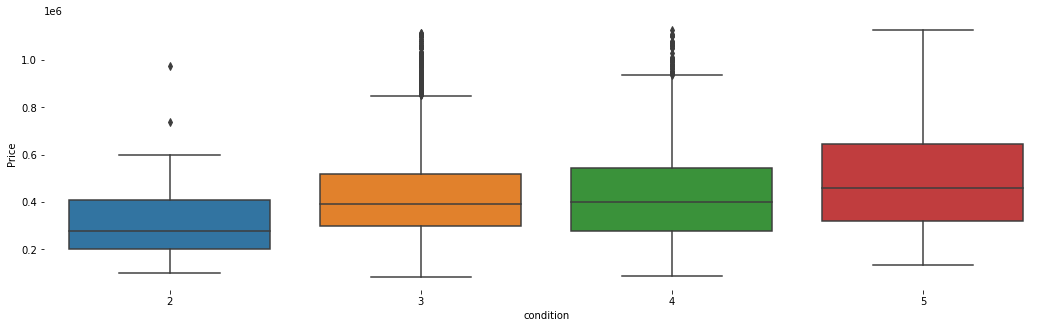

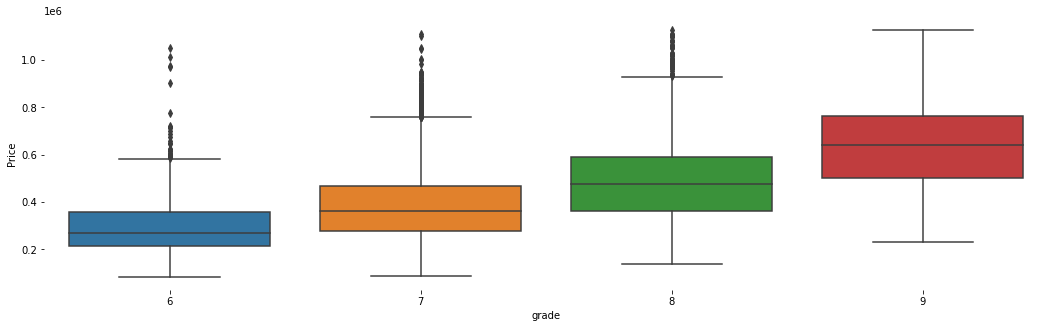

In [ ]:
columns = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade']
for c in columns:
    create_boxplot(df,c)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


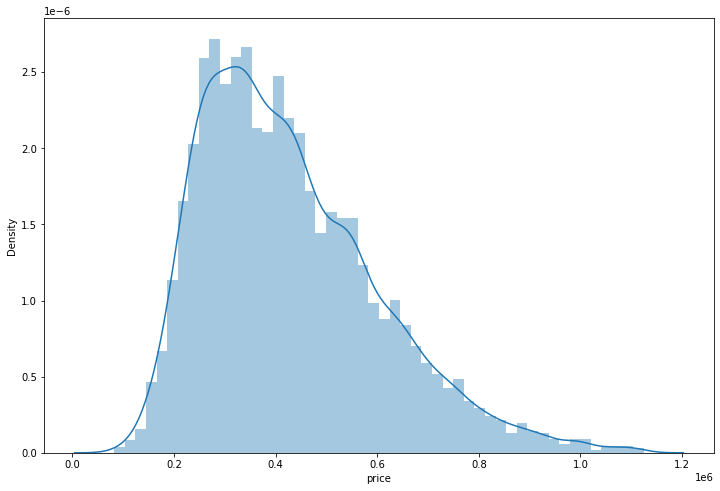

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


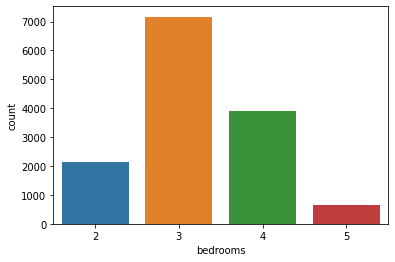

In [ ]:
sns.countplot(df['bedrooms']);

Casas com o numero de banheiros 3,4,5,6,7,8,9 tendem a ter preços mais altos

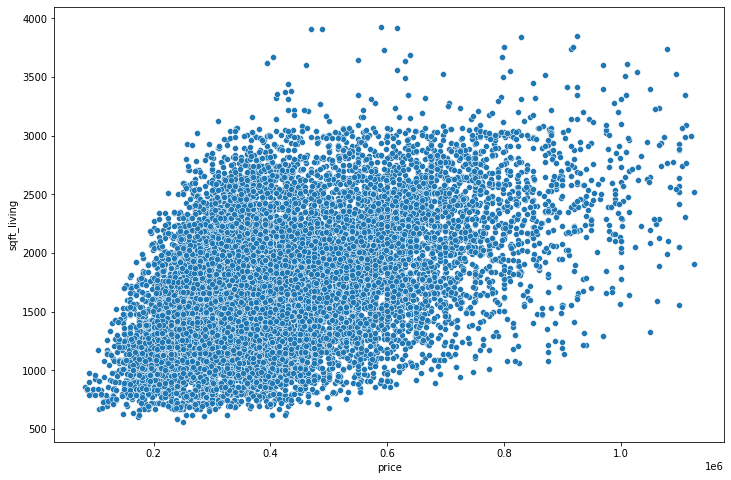

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

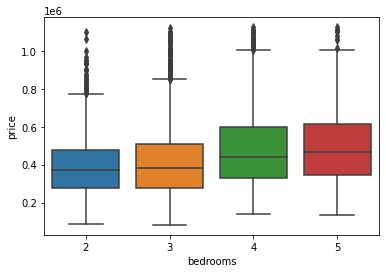

In [ ]:
sns.boxplot(x='bedrooms',y='price',data=df)

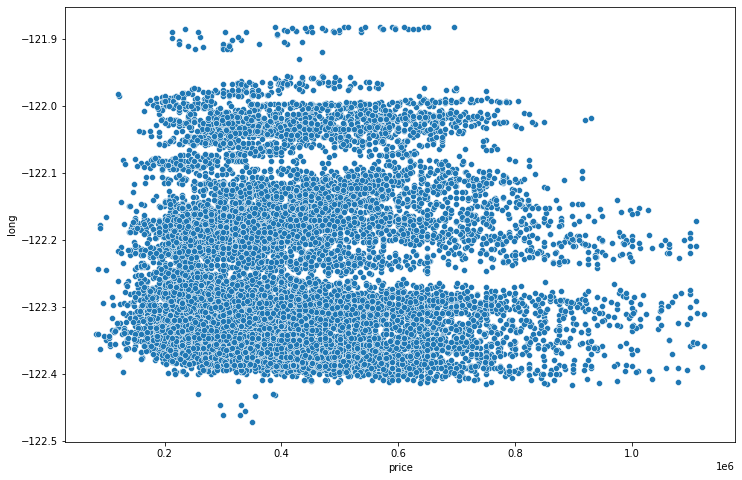

In [ ]:
#Analise geografica
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

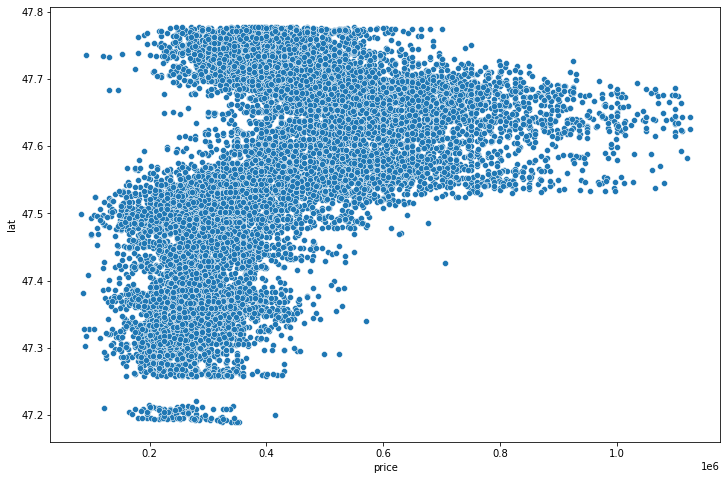

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

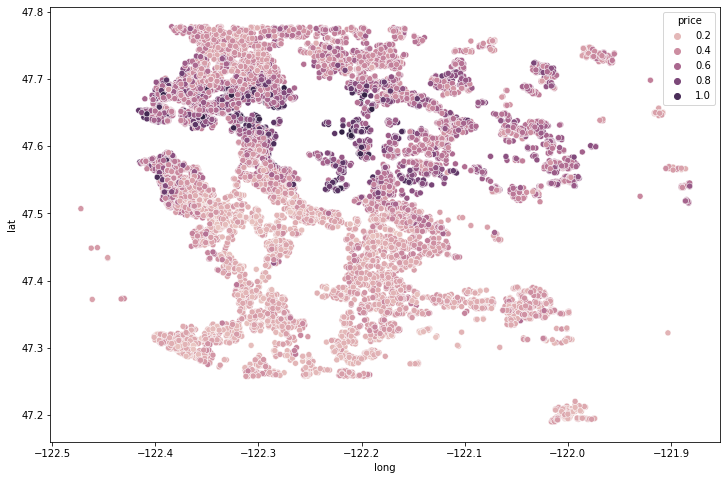

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [ ]:
# As 5 casas que eu indicaria para comprar.

df.sort_values('price',ascending=True).head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8274,3883800011,2014-11-05,82000.0,3,1.0,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
10253,2422049104,2014-09-15,85000.0,2,1.0,830,9000,1.0,0,0,...,6,830,0,1939,0,98032,47.3813,-122.243,1160,7680
13756,1788900230,2014-07-22,86500.0,3,1.0,840,9480,1.0,0,0,...,6,840,0,1960,0,98023,47.3277,-122.341,840,9420
5866,9320900420,2014-10-14,89000.0,3,1.0,900,4750,1.0,0,0,...,6,900,0,1969,0,98023,47.3026,-122.363,900,3404
12551,1049010620,2014-05-13,90000.0,2,1.0,790,2640,1.0,0,0,...,7,790,0,1973,0,98034,47.7351,-122.178,1310,2064


In [ ]:
#As 5 casas que eu não indicaria.

df.sort_values('price',ascending=False).head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11482,6819100111,2014-12-11,1125000.0,4,2.50,2520,2600,2.0,0,0,...,8,1670,850,1925,0,98119,47.6434,-122.358,2290,3600
2920,4232400110,2014-11-11,1125000.0,5,1.75,1910,5640,2.0,0,0,...,9,1910,0,1906,0,98112,47.6249,-122.311,2050,5400
639,6379500640,2015-04-09,1120000.0,3,1.50,3000,5750,2.0,0,0,...,9,2000,1000,1924,0,98116,47.5821,-122.390,1820,5750
7669,4232401265,2014-10-20,1112750.0,5,3.50,3090,3600,2.0,0,0,...,9,2060,1030,2000,0,98112,47.6217,-122.309,2240,3904
20769,5244801550,2014-09-16,1112000.0,4,3.00,2770,2650,2.0,0,0,...,9,2180,590,2014,0,98109,47.6435,-122.354,1820,2960


In [ ]:
def plotPerColumnDistribution(df1, nRows, nGraphPerRow):
    track = [[0]*nGraphPerRow]*nRows
    columnNames = df1.columns
        
    fig, ax = plt.subplots(nrows=nRows, ncols=nGraphPerRow, figsize=(20,10))
       
    row, col, i = 0,0,0
    while i<(len(columnNames)):
        if col<=nGraphPerRow-1:
            print(columnNames[i])
            valueCounts = df[columnNames[i]].value_counts().sort_index()
            valueCounts.plot(kind='bar', ax=ax[row][col])
            plt.ylabel('counts')
            plt.xticks(rotation = 90)
            ax[row][col].set_title(columnNames[i])
            col+=1
        else:
            col=0
            row+=1
            i-=1
        i+=1
            
    for j in range(col,nGraphPerRow):
        fig.delaxes(ax[row][j])
    
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

bedrooms
bathrooms
floors
waterfront
view
condition
grade


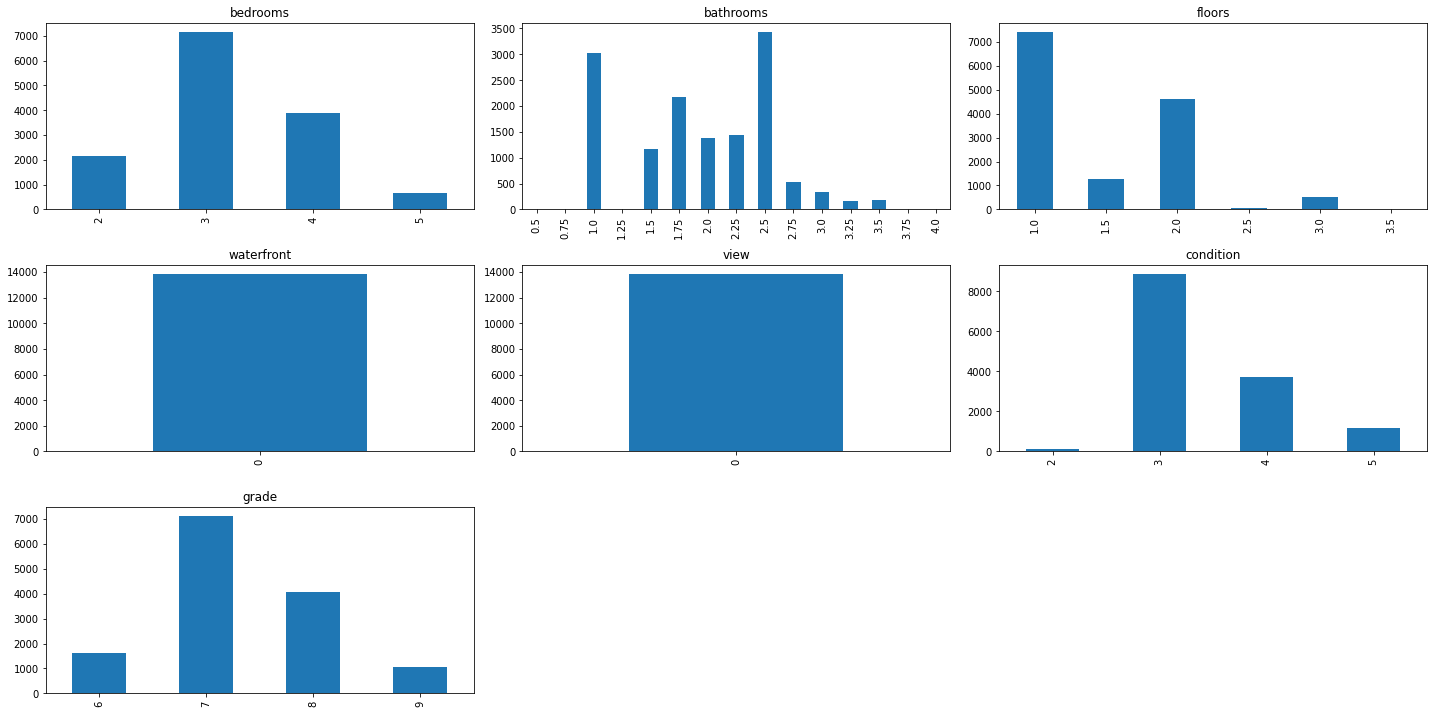

In [ ]:
df1 = df[["bedrooms", "bathrooms", "floors","waterfront", "view", "condition", "grade"]]
plotPerColumnDistribution(df1,3,3) 

#Insights.
"Bedroom": A maioria das casas contém 3 quartos (3,3 em média), exceto algumas casas com mais de 7 quartos e a contagem sobe para 33 quartos, agora isso pode ser tratado como outliers, mas considerando o fato de que estes podem ser algum tipo de casas luxuosas, vamos mantê-las e ver como nosso modelo está se saindo.

"Bathroom": À primeira vista, parece um pouco estranho porque os banheiros têm que estar em pontos flutuantes, mas faz sentido se colocarmos desta forma:
antes de continuar vamos entender a "bathroom classification"

1.1: Full bathroom: Um banheiro será considerado completo se tiver quatro componentes principais: vaso sanitário, pia, banheira e combinação de chuveiro ou banheira.

1.2: Half bathroom: Tem apenas dois dos quatro componentes principais do banheiro – normalmente um vaso sanitário e uma pia.

1.3: Three quarter bathroom: Possui um dos quatro componentes que faltam no banheiro completo, ou seja, banheira.

1.4: Quarter bathroom: Um quarto com apenas um dos quatro elementos - normalmente um banheiro. 
Agora, vamos colocar tudo isso na figure, então banheiros com números como 1, 2, 3 e assim por diante é autoexplicativo que esses são banheiros completos, números como 1,5 significa 1 banheiro completo e meio banheiro da mesma forma 2,5 significa 2 completos e meio banheiro, números como 1,75 significa 1 banheiro completo e três quartos e 1,25 significa 1 banheiro completo e um quarto.

"Floors": A coluna do piso contém valores flutuantes, que fazem sentido se colocarmos desta forma:
3.1: 1,5 andar significa 1 andar e um segundo andar parcial. da mesma forma, 2,5 significa 2 andares e um 3º andar parcial, 3,5 significa 3 andares e um 4º andar parcial.

"Waterfront": Fala sobre as casas que estão com vista para a orla, é categórica e podemos ver que mais de 99% das casas não têm vista para a orla, podemos soltar esta coluna, pois ela permanecerá a mesma para todos as casas e não agregará nenhum valor significativo ao nosso modelo.

"Visualizar": O mesmo vale para a visualização, podemos descartá-la, pois mais de 90% dos dados têm o mesmo valor.

"Grade": Pode ser algum tipo de classificação dada a cada casa com base no sistema de classificação King Country.